<a href="https://colab.research.google.com/github/sai-sreekhar/SmartBridge_ML-DL/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATA PREPROCESSING

# **Importing necessary libraries**

In [131]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Importing the dataset**

In [132]:
df = pd.read_csv("Titanic-Dataset.csv")

## **Display basic information about the dataset**

In [133]:
df.head()  # Display the first few rows of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [134]:
df.tail()  # Display the last few rows of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [135]:
df.shape   # Get the dimensions of the dataset (rows, columns)

(891, 12)

In [136]:
df.describe()  # Summary statistics of numerical columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [137]:
df.info()  # Information about columns and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [138]:
df.corr()  # Correlation matrix of numerical columns

<ipython-input-138-1f87ca8de661>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()  # Correlation matrix of numerical columns


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# **Handling null values**

In [139]:
df.isnull().any()  # Check if any columns have missing values

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [140]:
df.isnull().sum()  # Count the number of missing values in each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# **Inferences:**
The dataset has missing values in the 'Age', 'Cabin', and 'Embarked' columns.

## **Imputing missing values**

In [141]:
df["Age"].fillna(df["Age"].mean(), inplace=True)  # Fill missing 'Age' values with the mean

In [142]:
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)  # Fill missing 'Embarked' values with the mode

In [143]:
df.drop("Cabin", axis=1, inplace=True)  # Remove the 'Cabin' column due to a high number of missing values

## **Data Visualization**

Text(0.5, 1.0, 'Relationship between Parch and SibSp')

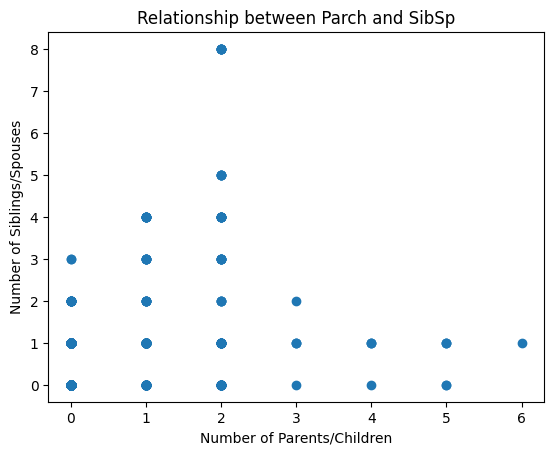

In [144]:
plt.scatter(df["Parch"], df["SibSp"])
plt.xlabel("Number of Parents/Children")
plt.ylabel("Number of Siblings/Spouses")
plt.title("Relationship between Parch and SibSp")

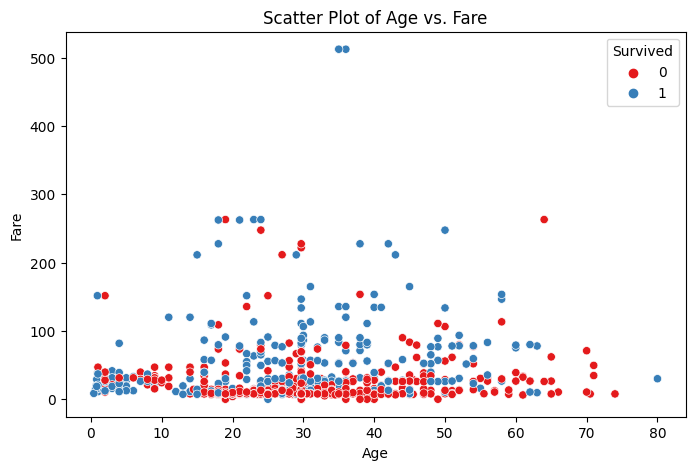

In [145]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Fare', data=df, hue='Survived', palette='Set1')
plt.title("Scatter Plot of Age vs. Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

# **Inferences:**


1.   The scatter plot of 'Parch' vs. 'SibSp' shows a positive correlation, indicating passengers with more family members.

2.   The scatter plot of 'Age' vs. 'Fare' shows no strong linear relationship between age and fare.

3.   There is no clear boundary separating survivors from non-survivors based solely on age and fare. **bold text**





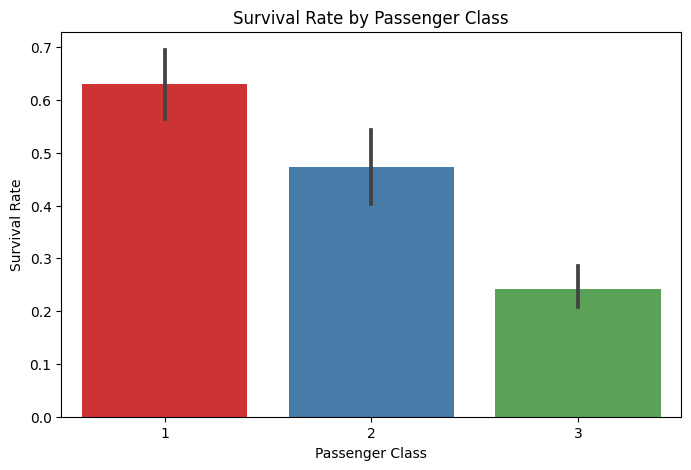

In [146]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=df, palette='Set1')
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.xlabel("Passenger Class")
plt.show()

# **Inferences**:

1.   Passengers in higher classes (1st class) had a significantly higher survival rate compared to those in lower classes (3rd class).

2.   Passenger class is an important predictor of survival.




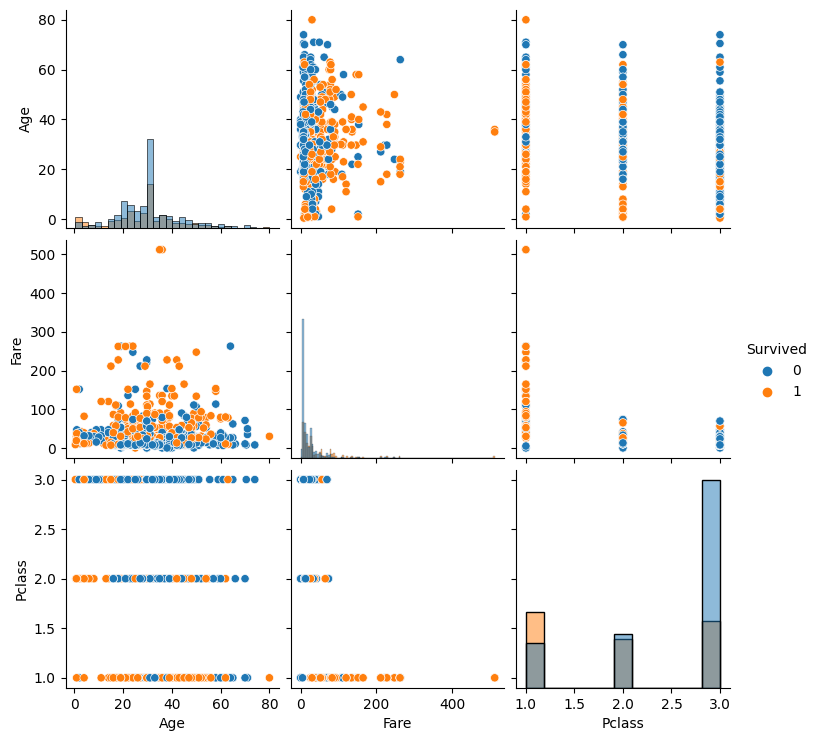

In [147]:
columns_to_plot = ['Age', 'Fare', 'Survived', 'Pclass']
sns.pairplot(df[columns_to_plot], hue='Survived', diag_kind='hist')
plt.show()

# **Inferences:**

The scatter plots show relationships between variables. Survived=1 (blue) points tend to have higher fares and are more evenly distributed across age groups compared to Survived=0 (orange) points.


<ipython-input-148-452fc4cd8a19>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

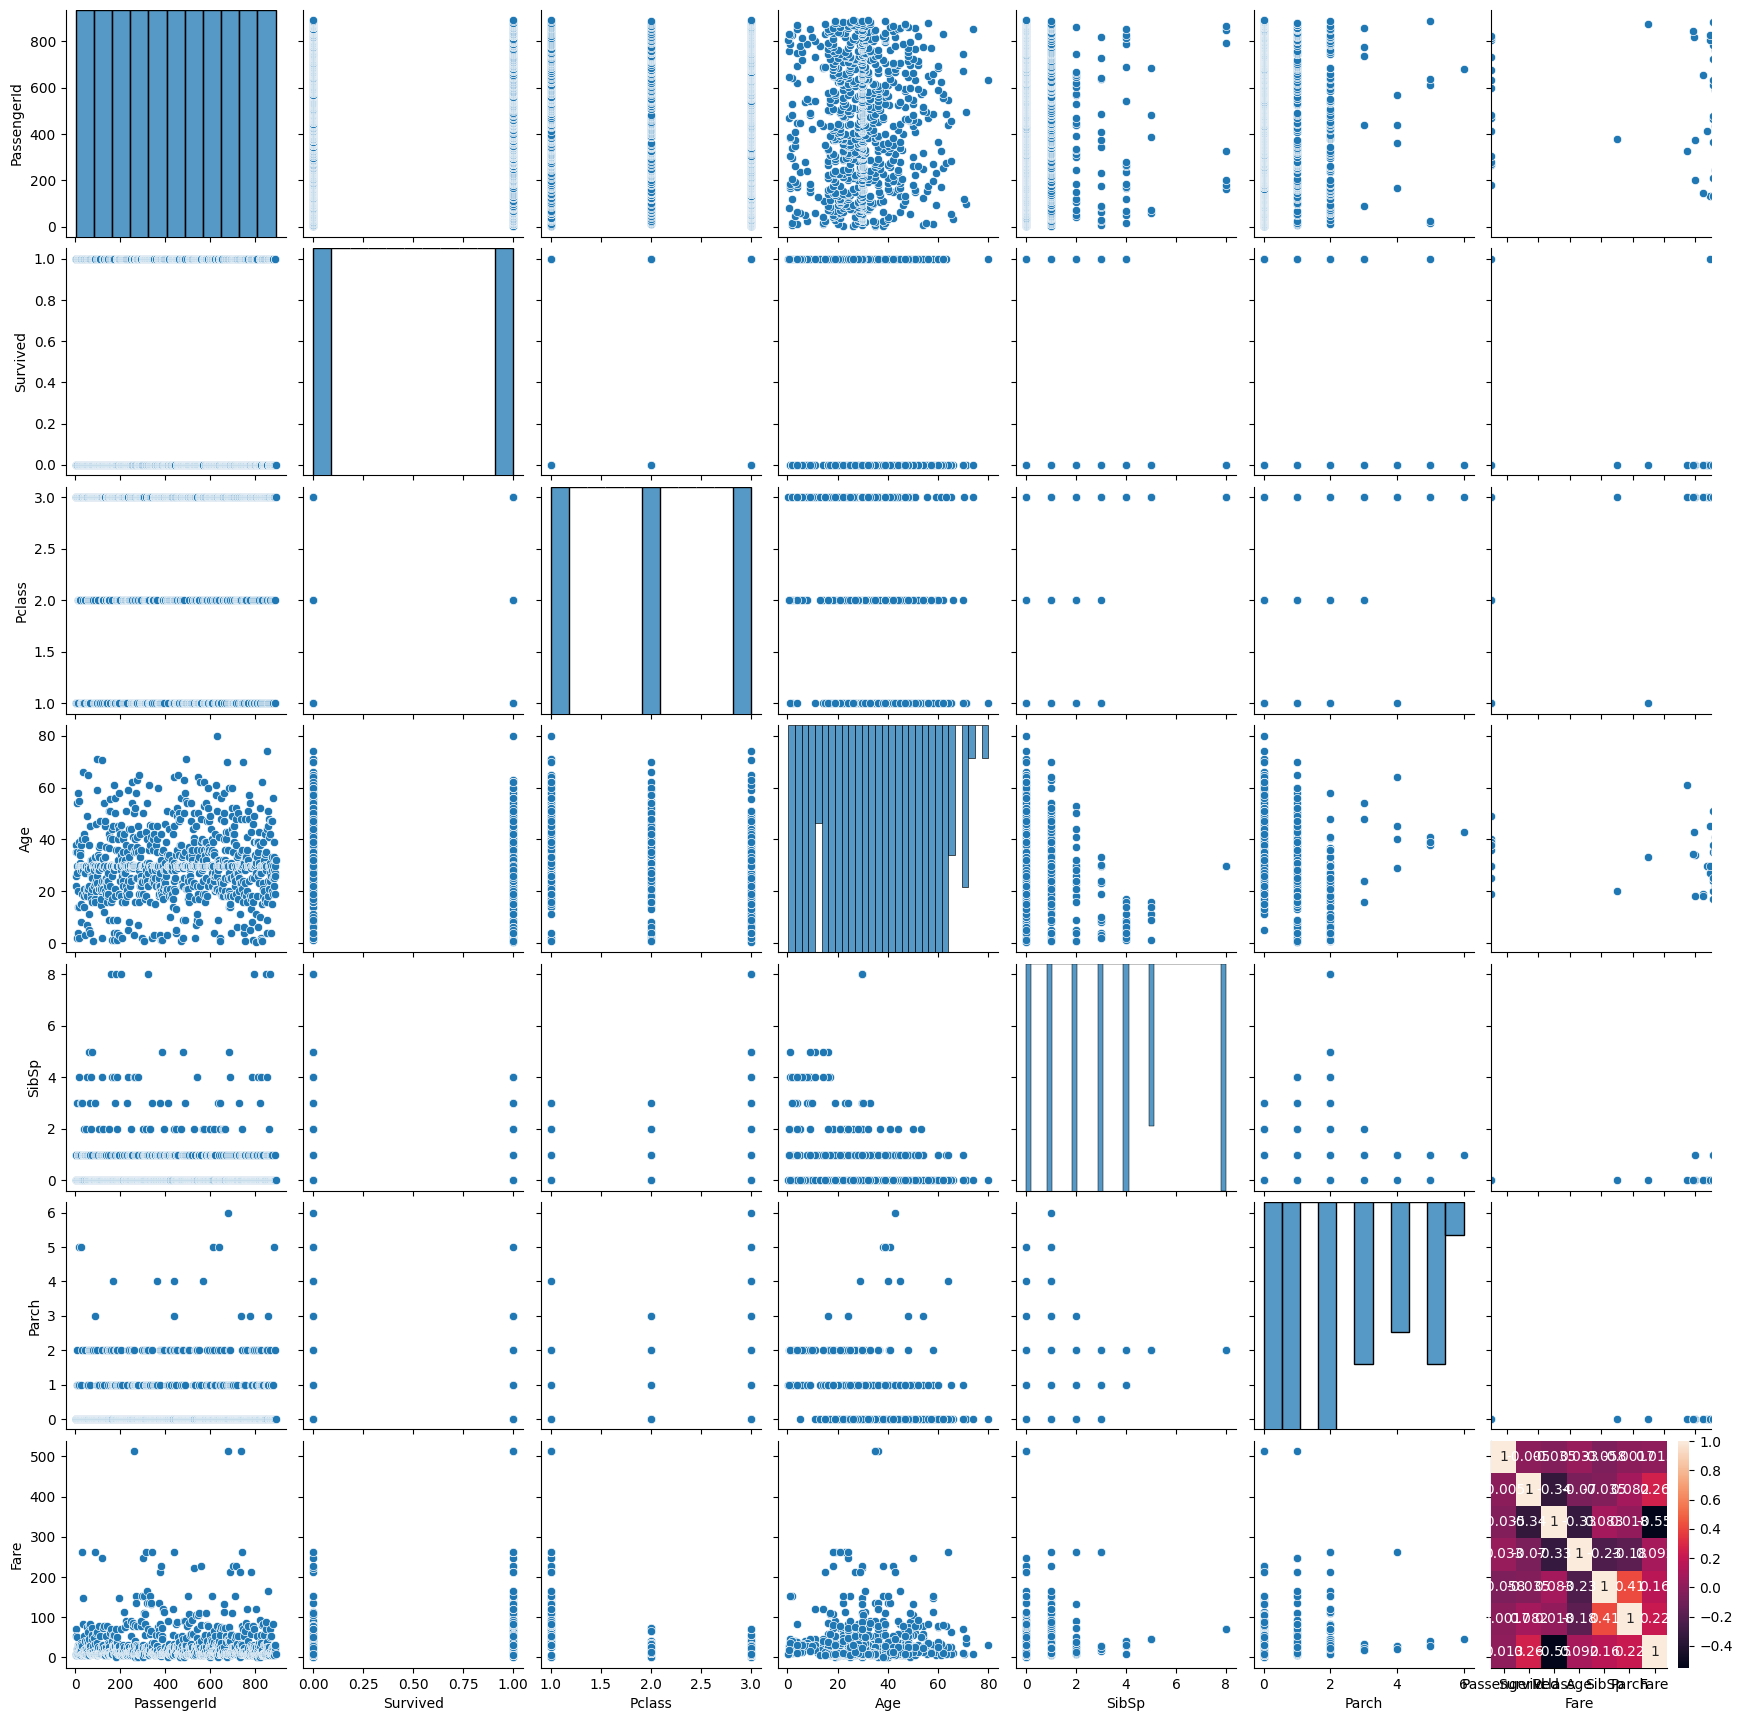

In [148]:
sns.pairplot(df)
sns.heatmap(df.corr(), annot=True)

# **Inferences:**
The heatmap shows correlations between features. Some key correlations are noted in the comments in the code.


## **Outlier Detection**

In [149]:
# Method 1: IQR (Interquartile Range)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

<ipython-input-149-ba1b81acbbe6>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-149-ba1b81acbbe6>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


In [150]:
# Detect and remove outliers using IQR
df_no_outliers = df[(df >= lower_limit) & (df <= upper_limit)]

<ipython-input-150-89111f7bf8d3>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_no_outliers = df[(df >= lower_limit) & (df <= upper_limit)]


In [151]:
# Method 2: Z-score for numeric columns
from scipy import stats
# Select only the numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=[np.number])
# Calculate z-scores for numeric columns
z_scores = np.abs(stats.zscore(numeric_columns))
threshold = 3  # You can adjust the threshold as needed
# Create a boolean mask to identify rows with outliers in any numeric column
outlier_mask = (z_scores > threshold).any(axis=1)
# Filter the original DataFrame to remove rows with outliers
df_no_outliers = df[~outlier_mask]

In [152]:
# Method 3: Percentile
lower_percentile = 5
upper_percentile = 95

In [153]:
# Calculate the lower and upper bounds based on percentiles
lower_bound = df.quantile(lower_percentile / 100)
upper_bound = df.quantile(upper_percentile / 100)

<ipython-input-153-7f3e404c1ac5>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lower_bound = df.quantile(lower_percentile / 100)
<ipython-input-153-7f3e404c1ac5>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  upper_bound = df.quantile(upper_percentile / 100)


In [154]:
# Detect and remove outliers using percentiles
df_no_outliers = df[(df >= lower_bound) & (df <= upper_bound)]

<ipython-input-154-f90eb615a718>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_no_outliers = df[(df >= lower_bound) & (df <= upper_bound)]


# **Splitting dependent and independent data**

In [155]:
columns_to_drop = ["Survived", "PassengerId", "Name", "Sex", "Ticket"]
x = df.drop(columns=columns_to_drop)
y = df["Survived"]

# **Encoding categorical variables (if needed)**

In [156]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x["Embarked"] = le.fit_transform(x["Embarked"])

# **Scaling features**

In [157]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
x_Scaled = pd.DataFrame(ms.fit_transform(x), columns=x.columns)

# **Splitting into training and testing data**

In [158]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_Scaled, y, test_size=0.2, random_state=0)


In [159]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(712, 6) (179, 6) (712,) (179,)


# **Inferences:**
1.   The code provides data preprocessing steps, including handling missing values, data visualization, and outlier detection.
2.   Important insights and visualizations are included throughout the code.
3.   The data is prepared for further machine learning modeling.
